[View in Colaboratory](https://colab.research.google.com/github/taisuke0812/gold_forecast/blob/master/gold_forecast.ipynb)

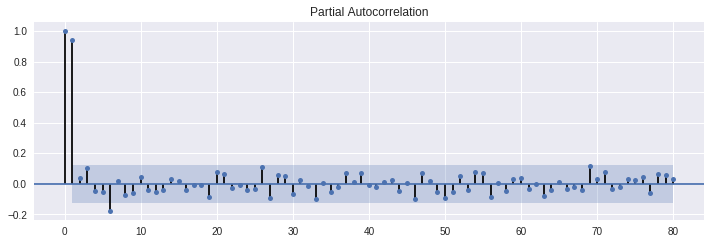

2016-11-16    4801.921706
2016-11-17    4806.559905
2016-11-18    4799.320284
2016-11-19    4800.721232
2016-11-20    4774.628719
2016-11-21    4795.310805
2016-11-22    4778.988150
2016-11-23    4760.951373
2016-11-24    4753.988150
2016-11-25    4739.836303
2016-11-26    4738.234881
2016-11-27    4753.831563
2016-11-28    4731.474502
2016-11-29    4757.555165
2016-11-30    4769.474502
2016-12-01    4773.875450
2016-12-02    4782.193364
2016-12-03    4793.552795
2016-12-04    4808.714122
2016-12-05    4815.352321
2016-12-06    4835.396208
2016-12-07    4859.672606
2016-12-08    4844.914596
2016-12-09    4865.792416
2016-12-10    4879.792416
2016-12-11    4871.714122
2016-12-12    4850.674976
2016-12-13    4859.992890
2016-12-14    4882.195734
2016-12-15    4874.115070
2016-12-16    4832.181514
2016-12-17    4852.746159
2016-12-18    4878.068814
2016-12-19    4872.389098
2016-12-20    4896.465022
2016-12-21    4879.670236
2016-12-22    4878.753269
2016-12-23    4851.073554
2016-12-24  

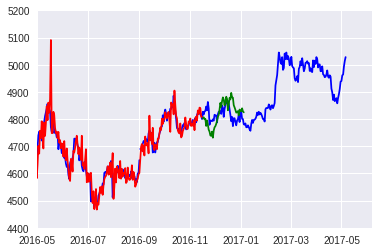

0.38


In [62]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools
%matplotlib inline



#uploaded = files.upload()

#データを読み込む。このとき、日付がstr型だと都合が悪いのでPandas.Timestamp型に変換しておく
#データはここ(https://lets-gold.net/historical_data.php)から
#リンクから直接getできない様子なのでローカルに保存してから処理することにした 
#gold_data = pd.read_csv("historical_data_2016.csv",index_col = "DATE",parse_dates = ["DATE"])
gold_data = pd.read_csv("historical_data_2016.csv")
gold_data2 = pd.read_csv("historical_data_2017.csv")
#連続していない時系列のデータでは処理できない？
#まだよくわかっていないがすべて連続した日付と加工したところうまくいった
gold_data.index = pd.date_range("2016-01-01","2016-09-01",freq="D")
gold_data2.index = pd.date_range("2016-09-02","2017-05-06",freq="D")
del gold_data["DATE"]

#型を確認する
#print(type(gold_data.index))
#一応、各列の関係を調べておく
#print(gold_data.corr())
#今回のデータでは列間に大きな関係はなさそう
#必要のない列を削除しておく
gold_ = gold_data.drop(columns = ["PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])
gold_.dropna()
gold2_ = gold_data2.drop(columns = ["DATE","PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])

gold = pd.concat([gold_,gold2_])
gold.index = pd.date_range("2016-01-01","2017-05-06",freq = "D")

#まず、現状のデータを確認する。
#print(type(gold_["GOLD_TOKYO"]))
#plt.plot(gold_data["DATE"],gold_data["GOLD_TOKYO"])
#自己相関係数を計算する。
#gold_acf = sm.tsa.stattools.acf(gold_data["GOLD_TOKYO"], nlags=31)
#print(gold_acf)
#どうやら前日、前々日のデータがかなり影響を及ぼしているらしい

#まず、対数変換して変化をみてみる
#gold_data["GOLD_TOKYO"] = pd.Series(np.log(gold_data["GOLD_TOKYO"]))
#gold_acf = sm.tsa.stattools.acf(gold_data["GOLD_TOKYO"], nlags=31)
#print(gold_acf)
#どうやら自己相関係数は若干減少してしまう...
#gold_pacf = sm.tsa.stattools.pacf(gold_data["GOLD_TOKYO"], nlags=31, method='ols')
#print(gold_pacf)

# 偏自己相関係数のグラフを出力
fig=plt.figure(figsize=(12, 8))
ax = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(gold_data["GOLD_TOKYO"], lags=80, ax=ax)
plt.plot
plt.show()

#2,7,46,69あたりが大きくなっている

#ADF検定を行う
#参照(https://blog.brains-tech.co.jp/entry/arima-tutorial-2)
#adf_result = sm.tsa.stattools.adfuller(gold_data["GOLD_TOKYO"])
#print(adf_result)
#p値は0.64?
#階差をとってみる
#gold_diff = gold_.diff()
#gold_diff.index = gold_data.index
#gold_diff = gold_diff.dropna()
#print(gold_diff)

#selectparameter(gold_,10)
#(0, 1, 0), (0, 1, 1, 10)
#320点なら60が良い
#gold = gold[:320]
test = gold[:]
N=320
#N=370
#N = 420
gold = gold[:N]
#グラフよりs=50,69あたりが良い？
ARIMA_gold = sm.tsa.statespace.SARIMAX(gold,order=(0, 1, 0),seasonal_order = (1,1,0,69), enforce_stationarity = False, enforce_invertibility = False,trend = "n").fit(trend='nc',disp=False)


#print(ARIMA_gold.summary())
pred = ARIMA_gold.predict()


pred2 = ARIMA_gold.forecast(50)
print(pred2)

#predict_dy = ARIMA_gold.get_prediction(start='2016-01-04', end='2016-12-30',dynamic='2016-12-22')
#print(pred,gold_diff)
#
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(gold, lags=40, ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(gold, lags=40, ax=ax2)


plt.plot(gold_,color = "b")
plt.plot(gold2_,color = "b")
plt.plot(pred,color = "r")
plt.plot(pred2,color="g")

plt.xlim(["2016-05-01","2017-06-06"])
plt.ylim([4400,5200])
plt.show()


data_score = 0
for i in range(49):
  if pred[i+1] - pred[i] > 0:
    if test.values[N+1+i] - test.values[N+i] > 0:
      data_score += 1
  if pred[i+1] - pred[i] < 0:
    if test.values[N+1+i] - test.values[N+i] < 0:
      data_score += 1

print(data_score/50)
#320:正答率38%
#370:正答率62%
#420:正答率42%

In [1]:
!pip install keras


In [0]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline


uploaded = files.upload()

#データを読み込む。このとき、日付がstr型だと都合が悪いのでPandas.Timestamp型に変換しておく
#データはここ(https://lets-gold.net/historical_data.php)から
gold_data = pd.read_csv("historical_data_2016_tmp.csv",index_col = "DATE",parse_dates = ["DATE"])
#型を確認する
#print(type(gold_data.index))
#一応、各列の関係を調べておく
#print(gold_data.corr())
#今回のデータでは列間に大きな関係はなさそうなのでいらないと判断した。
#必要のない列を削除しておく
gold_ = gold_data.drop(columns = ["PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])
gold_.dropna()
gold = gold_[:23]
#まず、現状のデータを確認する。
#print(type(gold_["GOLD_TOKYO"]))
#plt.plot(gold_data["DATE"],gold_data["GOLD_TOKYO"])
#自己相関係数を計算する。
gold_acf = sm.tsa.stattools.acf(gold_data["GOLD_TOKYO"], nlags=31)
#print(gold_acf)
#どうやら前日、前々日のデータがかなり影響を及ぼしているらしい

#まず、対数変換して変化をみてみる
#gold_data["GOLD_TOKYO"] = pd.Series(np.log(gold_data["GOLD_TOKYO"]))
#gold_acf = sm.tsa.stattools.acf(gold_data["GOLD_TOKYO"], nlags=31)
#print(gold_acf)
#どうやら自己相関係数は若干減少してしまう...
gold_pacf = sm.tsa.stattools.pacf(gold_data["GOLD_TOKYO"], nlags=31, method='ols')
#print(gold_pacf)

# 偏自己相関係数のグラフを出力します
#fig=plt.figure(figsize=(12, 8))
#ax = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(gold_data["GOLD_TOKYO"], lags=30, ax=ax)
#plt.plot

#季節変動はなさそうである。

#ADF検定を行う
#参照(https://blog.brains-tech.co.jp/entry/arima-tutorial-2)
adf_result = sm.tsa.stattools.adfuller(gold_data["GOLD_TOKYO"])
#print(adf_result)
#p値が0.64であるので
#次に、階差をとってみる
gold_diff = gold_.diff()
gold_diff.index = gold_data.index
gold_diff = gold_diff.dropna()
#print(gold_diff)

ARIMA_gold = sm.tsa.statespace.SARIMAX(gold,order=(1, 2, 3), enforce_stationarity = False, enforce_invertibility = False,trend = "n").fit(trend='nc',disp=False)

start = datetime(2016,11,17)
end = datetime(2016,12,27)
#print(ARIMA_gold.summary())
pred = ARIMA_gold.predict()

#このpred2がうまく計算できないので諦める
pred2 = ARIMA_gold.get_forecast(5)

#欠損値をどうにか追加したい
#tmp = pd.read_csv("historical_data_2016.csv")

#date = pd.date_range("2016-1-1","2016-12-31")
#short = []
#i=0
#for name in tmp["DATE"]:
  #if name != str(date[i]):
      #mean = 5000
      #short.append(mean)
      #i-=1
      #continue
  #i+=1
  
  
#print(short)
#print(len(short))
#predict_dy = ARIMA_gold.get_prediction(start='2016-01-04', end='2016-12-30',dynamic='2016-12-22')
#print(pred,gold_diff)



plt.plot(gold,color = "b")
plt.plot(pred,color = "r")
#plt.xlim(["2016-01-11","2016-12-30"])
#plt.ylim([4600,5100])
plt.show()


In [27]:
!pip install cython

    100% |████████████████████████████████| 3.4MB 7.7MB/s 


In [28]:
!pip3 install git+https://github.com/statsmodels/statsmodels.git

  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-gk42np6y
  Installing build dependencies ... - \ | / - \ | / - done
  Running setup.py bdist_wheel for statsmodels ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-p9ax2cs1/wheels/7b/bd/6d/3192a61f34609bda0eea70342907984dba2ad17c3abb502ce7
Successfully built statsmodels
  Found existing installation: statsmodels 0.8.0
    Uninstalling statsmodels-0.8.0:
      Successfully uninstalled statsmodels-0.8.0


[(0, 1, 0), (1, 1, 0, 69), 1845.9233668440336]

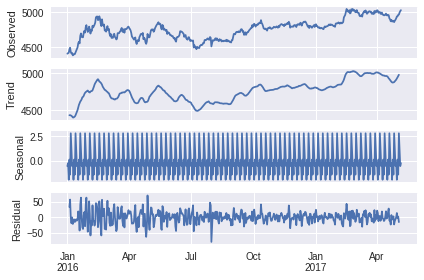

In [59]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools
%matplotlib inline


def selectparameter(DATA,s):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(p, d, q))]
    parameters = []
    BICs = np.array([])
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(DATA,
                                            order=param,
                                            seasonal_order=param_seasonal)
                results = mod.fit()
                parameters.append([param, param_seasonal, results.bic])
                BICs = np.append(BICs,results.bic)
            except:
                continue
    return parameters[np.argmin(BICs)]

#uploaded = files.upload()


#uploaded = files.upload()

#データを読み込む。このとき、日付がstr型だと都合が悪いのでPandas.Timestamp型に変換しておく
#データはここ(https://lets-gold.net/historical_data.php)から
#gold_data = pd.read_csv("historical_data_2016.csv",index_col = "DATE",parse_dates = ["DATE"])
gold_data = pd.read_csv("historical_data_2016.csv")
gold_data2 = pd.read_csv("historical_data_2017.csv")
gold_data.index = pd.date_range("2016-01-01","2016-09-01",freq="D")
gold_data2.index = pd.date_range("2016-09-02","2017-05-06",freq="D")
del gold_data["DATE"]

#型を確認する
#print(type(gold_data.index))
#一応、各列の関係を調べておく
#print(gold_data.corr())
#今回のデータでは列間に大きな関係はなさそうなのでいらないと判断した。
#必要のない列を削除しておく
gold_ = gold_data.drop(columns = ["PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])
gold_.dropna()
gold2_ = gold_data2.drop(columns = ["DATE","PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])

gold = pd.concat([gold_,gold2_])
gold.index = pd.date_range("2016-01-01","2017-05-06",freq = "D")





res = sm.tsa.seasonal_decompose(gold, freq=69)
res.plot()
res.show()

selectparameter(gold_,69)

2017-05-15    4749.333070
2017-05-16    4757.665464
2017-05-17    4743.667043
2017-05-18    4739.000902
2017-05-19    4747.499944
2017-05-20    4728.335438
2017-05-21    4723.502650
2017-05-22    4718.669861
2017-05-23    4713.003833
2017-05-24    4675.841357
2017-05-25    4674.341527
2017-05-26    4695.339159
2017-05-27    4706.837862
2017-05-28    4711.837298
2017-05-29    4703.671553
2017-05-30    4702.005074
2017-05-31    4721.002932
2017-06-01    4717.503326
2017-06-02    4710.504116
2017-06-03    4692.672793
2017-06-04    4708.004398
2017-06-05    4702.838314
2017-06-06    4692.672793
2017-06-07    4709.004285
2017-06-08    4708.004398
2017-06-09    4718.945579
2017-06-10    4726.516276
2017-06-11    4745.371596
2017-06-12    4736.515309
2017-06-13    4743.800319
Freq: D, dtype: float64


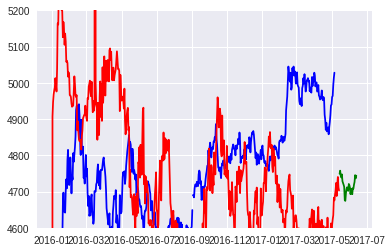

In [25]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools
%matplotlib inline



#uploaded = files.upload()

#データを読み込む。このとき、日付がstr型だと都合が悪いのでPandas.Timestamp型に変換しておく
#データはここ(https://lets-gold.net/historical_data.php)から
#gold_data = pd.read_csv("historical_data_2016.csv",index_col = "DATE",parse_dates = ["DATE"])
gold_data = pd.read_csv("historical_data_2016.csv")
gold_data2 = pd.read_csv("historical_data_2017.csv")
gold_data3 = pd.read_csv("historical_data_2015.csv")
gold_data.index = pd.date_range("2016-01-01","2016-09-01",freq="D")
gold_data2.index = pd.date_range("2016-09-02","2017-05-06",freq="D")
gold_data3.index = pd.date_range("2017-05-07","2018-01-05",freq = "D")
del gold_data["DATE"]

#型を確認する
#print(type(gold_data.index))
#一応、各列の関係を調べておく
#print(gold_data.corr())
#今回のデータでは列間に大きな関係はなさそうなのでいらないと判断した。
#必要のない列を削除しておく
gold_ = gold_data.drop(columns = ["PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])
gold_.dropna()
gold2_ = gold_data2.drop(columns = ["DATE","PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])
gold3_ = gold_data3.drop(columns = ["DATE","PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])
gold = pd.concat([gold3_,gold_,gold2_])
gold.index = pd.date_range("2016-01-01","2018-01-05",freq = "D")

#まず、現状のデータを確認する。
#print(type(gold_["GOLD_TOKYO"]))
#plt.plot(gold_data["DATE"],gold_data["GOLD_TOKYO"])
#自己相関係数を計算する。
gold_acf = sm.tsa.stattools.acf(gold_data["GOLD_TOKYO"], nlags=31)
#print(gold_acf)
#どうやら前日、前々日のデータがかなり影響を及ぼしているらしい

#まず、対数変換して変化をみてみる
#gold_data["GOLD_TOKYO"] = pd.Series(np.log(gold_data["GOLD_TOKYO"]))
#gold_acf = sm.tsa.stattools.acf(gold_data["GOLD_TOKYO"], nlags=31)
#print(gold_acf)
#どうやら自己相関係数は若干減少してしまう...
gold_pacf = sm.tsa.stattools.pacf(gold_data["GOLD_TOKYO"], nlags=31, method='ols')
#print(gold_pacf)

# 偏自己相関係数のグラフを出力します
#fig=plt.figure(figsize=(12, 8))
#ax = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(gold_data["GOLD_TOKYO"], lags=30, ax=ax)
#plt.plot

#季節変動はなさそうである。

#ADF検定を行う
#参照(https://blog.brains-tech.co.jp/entry/arima-tutorial-2)
adf_result = sm.tsa.stattools.adfuller(gold_data["GOLD_TOKYO"])
#print(adf_result)
#p値が0.64であるので
#次に、階差をとってみる
gold_diff = gold_.diff()
gold_diff.index = gold_data.index
gold_diff = gold_diff.dropna()
#print(gold_diff)

#selectparameter(gold_,10)
#(0, 1, 0), (0, 1, 1, 10)

#gold = gold[:420]
gold = gold[:500]
ARIMA_gold = sm.tsa.statespace.SARIMAX(gold,order=(0, 1, 0),seasonal_order = (0,1,1,75), enforce_stationarity = False, enforce_invertibility = False,trend = "n").fit(trend='nc',disp=False)


#print(ARIMA_gold.summary())
pred = ARIMA_gold.predict()

#このpred2がうまく計算できないので諦める
#できた
pred2 = ARIMA_gold.forecast(30)
print(pred2)

#predict_dy = ARIMA_gold.get_prediction(start='2016-01-04', end='2016-12-30',dynamic='2016-12-22')
#print(pred,gold_diff)



plt.plot(gold_,color = "b")
plt.plot(gold2_,color = "b")
plt.plot(pred,color = "r")
plt.plot(pred2,color="g")

#plt.xlim(["2016-05-01","2017-06-06"])
plt.ylim([4600,5200])
plt.show()


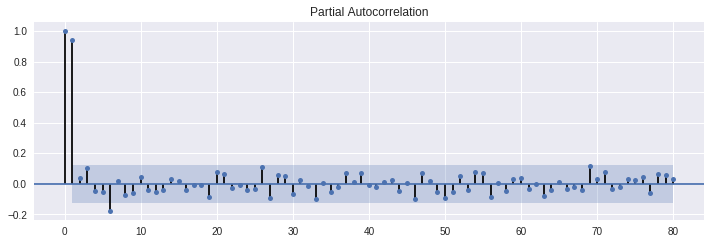

(-3.0892970073382093, 0.027355464092718447, 5, 239, {'1%': -3.458010773719797, '5%': -2.8737103617125186, '10%': -2.5732559963936206}, 2249.5851203146603)
                                 Statespace Model Results                                 
Dep. Variable:                         GOLD_TOKYO   No. Observations:                  320
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 69)   Log Likelihood                -889.623
Date:                            Sat, 08 Sep 2018   AIC                           1783.246
Time:                                    14:03:18   BIC                           1790.782
Sample:                                01-01-2016   HQIC                          1786.255
                                     - 11-15-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

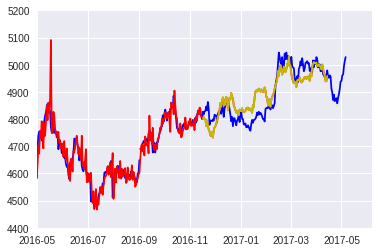

0.45
0.4375


In [28]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools
%matplotlib inline



#uploaded = files.upload()

#データを読み込む。このとき、日付がstr型だと都合が悪いのでPandas.Timestamp型に変換しておく
#データはここ(https://lets-gold.net/historical_data.php)から
#リンクから直接getできない様子なのでローカルに保存してから処理することにした 
#gold_data = pd.read_csv("historical_data_2016.csv",index_col = "DATE",parse_dates = ["DATE"])
gold_data = pd.read_csv("historical_data_2016.csv")
gold_data2 = pd.read_csv("historical_data_2017.csv")
#連続していない時系列のデータでは処理できない？
#まだよくわかっていないがすべて連続した日付と加工したところうまくいった
gold_data.index = pd.date_range("2016-01-01","2016-09-01",freq="D")
gold_data2.index = pd.date_range("2016-09-02","2017-05-06",freq="D")
del gold_data["DATE"]

#型を確認する
#print(type(gold_data.index))
#一応、各列の関係を調べておく
#print(gold_data.corr())
#今回のデータでは列間に大きな関係はなさそう
#必要のない列を削除しておく
gold_ = gold_data.drop(columns = ["PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])
gold_.dropna()
gold2_ = gold_data2.drop(columns = ["DATE","PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])

gold = pd.concat([gold_,gold2_])
gold.index = pd.date_range("2016-01-01","2017-05-06",freq = "D")

#まず、現状のデータを確認する。
#print(type(gold_["GOLD_TOKYO"]))
#plt.plot(gold_data["DATE"],gold_data["GOLD_TOKYO"])
#自己相関係数を計算する。
#gold_acf = sm.tsa.stattools.acf(gold_data["GOLD_TOKYO"], nlags=31)
#print(gold_acf)
#どうやら前日、前々日のデータがかなり影響を及ぼしているらしい

#まず、対数変換して変化をみてみる
#gold_data["GOLD_TOKYO"] = pd.Series(np.log(gold_data["GOLD_TOKYO"]))
#gold_acf = sm.tsa.stattools.acf(gold_data["GOLD_TOKYO"], nlags=31)
#print(gold_acf)
#どうやら自己相関係数は若干減少してしまう...
#gold_pacf = sm.tsa.stattools.pacf(gold_data["GOLD_TOKYO"], nlags=31, method='ols')
#print(gold_pacf)

# 偏自己相関係数のグラフを出力
fig=plt.figure(figsize=(12, 8))
ax = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(gold_data["GOLD_TOKYO"], lags=80, ax=ax)
plt.plot
plt.show()

#2,7,46,69あたりが大きくなっている

#ADF検定を行う
#参照(https://blog.brains-tech.co.jp/entry/arima-tutorial-2)
adf_result = sm.tsa.stattools.adfuller(gold_data["GOLD_TOKYO"])
print(adf_result)
#p値は0.64?
#階差をとってみる
#gold_diff = gold_.diff()
#gold_diff.index = gold_data.index
#gold_diff = gold_diff.dropna()
#print(gold_diff)

#selectparameter(gold_,10)
#(0, 1, 0), (0, 1, 1, 10)
#320点なら60が良い
#gold = gold[:320]
test = gold[:]
N=320
#N=370
#N = 420
gold = gold[:N]
#グラフよりs=50,69あたりが良い？
gold_mean = np.mean(gold.values)
gold_std = np.std(gold.values)

gold_b = (gold - gold_mean)/gold_std

ARIMA_gold = sm.tsa.statespace.SARIMAX(gold,order=(0, 1, 0),seasonal_order = (1,1,0,69), enforce_stationarity = False, enforce_invertibility = False,trend = "n").fit(trend='nc',disp=False)

ARIMA_std = sm.tsa.statespace.SARIMAX(gold_b,order=(0, 1, 0),seasonal_order = (1,1,0,69), enforce_stationarity = False, enforce_invertibility = False,trend = "n").fit(trend='nc',disp=False)
print(ARIMA_gold.summary())
print(ARIMA_std.summary())

pred = ARIMA_gold.predict()
pred_b = ARIMA_std.predict()
pred2_b = ARIMA_std.forecast(150)
pred2 = ARIMA_gold.forecast(150)


pred_b = (pred_b + gold_mean)*gold_std
pred2_b = pred2_b*gold_std + gold_mean
#predict_dy = ARIMA_gold.get_prediction(start='2016-01-04', end='2016-12-30',dynamic='2016-12-22')
#print(pred,gold_diff)
#
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(gold, lags=40, ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(gold, lags=40, ax=ax2)
#print(str(pred2.values) + str(pred2_b.values))

plt.plot(gold_,color = "b")
plt.plot(gold2_,color = "b")
plt.plot(pred,color = "r")
plt.plot(pred2,color="r")
plt.plot(pred_b,color = "y")
plt.plot(pred2_b,color = "y")

plt.xlim(["2016-05-01","2017-06-06"])
plt.ylim([4400,5200])
plt.show()


data_score = 0
for i in range(79):
  if pred[i+1] - pred[i] > 0:
    if test.values[N+1+i] - test.values[N+i] > 0:
      data_score += 1
  if pred[i+1] - pred[i] < 0:
    if test.values[N+1+i] - test.values[N+i] < 0:
      data_score += 1

print(data_score/80)

data_score = 0
for i in range(79):
  if pred2_b[i+1] - pred2_b[i] > 0:
    if test.values[N+1+i] - test.values[N+i] > 0:
      data_score += 1
  if pred2_b[i+1] - pred2_b[i] < 0:
    if test.values[N+1+i] - test.values[N+i] < 0:
      data_score += 1

print(data_score/80)

23.75%


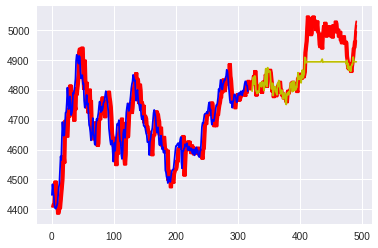

In [54]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools
%matplotlib inline



#uploaded = files.upload()

#データを読み込む。このとき、日付がstr型だと都合が悪いのでPandas.Timestamp型に変換しておく
#データはここ(https://lets-gold.net/historical_data.php)から
#リンクから直接getできない様子なのでローカルに保存してから処理することにした 
#gold_data = pd.read_csv("historical_data_2016.csv",index_col = "DATE",parse_dates = ["DATE"])
gold_data = pd.read_csv("historical_data_2016.csv")
gold_data2 = pd.read_csv("historical_data_2017.csv")
#連続していない時系列のデータでは処理できない？
#まだよくわかっていないがすべて連続した日付と加工したところうまくいった
gold_data.index = pd.date_range("2016-01-01","2016-09-01",freq="D")
gold_data2.index = pd.date_range("2016-09-02","2017-05-06",freq="D")
del gold_data["DATE"]

#型を確認する
#print(type(gold_data.index))
#一応、各列の関係を調べておく
#print(gold_data.corr())
#今回のデータでは列間に大きな関係はなさそう
#必要のない列を削除しておく
gold_ = gold_data.drop(columns = ["PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])
gold_.dropna()
gold2_ = gold_data2.drop(columns = ["DATE","PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])

gold = pd.concat([gold_,gold2_])
gold.index = pd.date_range("2016-01-01","2017-05-06",freq = "D")


#4日目くらいまでのデータに意味がありそうだったので使ってみる
gold["lag1"] = gold["GOLD_TOKYO"].shift(1)
gold["lag2"] = gold["GOLD_TOKYO"].shift(2)
gold["lag3"] = gold["GOLD_TOKYO"].shift(3)
gold["lag4"] = gold["GOLD_TOKYO"].shift(4)
gold.dropna()

N = 320

X_train = np.delete(gold[['lag1', 'lag2', 'lag3']][:N].values,[0,1,2],0)
X_test = np.delete(gold[['lag1', 'lag2', 'lag3']][N:].values,[0,1,2],0)
y_train = np.delete(gold['GOLD_TOKYO'][:N].values,[0,1,2],0)                
y_test = np.delete(gold['GOLD_TOKYO'][N:].values,[0,1,2],0)

from sklearn.ensemble import RandomForestRegressor
r_forest = RandomForestRegressor(
            n_estimators=100,
            criterion='mse',
            random_state=1,
            n_jobs=-1
)
r_forest.fit(X_train, y_train)
y_train_pred = r_forest.predict(X_train)
y_test_pred = r_forest.predict(X_test)
#結合するとグラフがうまく表示できない
#pred = np.hstack((y_train_pred,y_test_pred))

plt.plot(gold.values,color = "r")
plt.plot(y_train_pred, color = "b")
y_index = np.array(range(N+3,len(gold)))
plt.plot(y_index,y_test_pred,color = "y")


data_score = 0
for i in range(40):
  if y_test_pred[i+1] - y_test_pred[i] > 0:
    if y_test[i+1] - y_test[i] > 0:
      data_score += 1
  if y_test_pred[i+1] - y_test_pred[i] < 0:
    if y_test[1+i] - y_test[i] < 0:
      data_score += 1
      
print(str(100*data_score/80)+"%")

正解率:27.5%


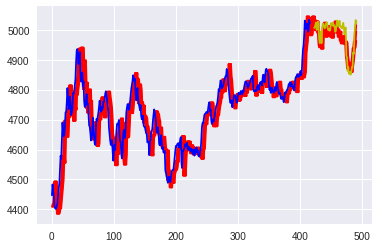

In [71]:
#標準化してみたが効果がなさそうである。


import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools
%matplotlib inline



#uploaded = files.upload()

#データを読み込む。このとき、日付がstr型だと都合が悪いのでPandas.Timestamp型に変換しておく
#データはここ(https://lets-gold.net/historical_data.php)から
#リンクから直接getできない様子なのでローカルに保存してから処理することにした 
#gold_data = pd.read_csv("historical_data_2016.csv",index_col = "DATE",parse_dates = ["DATE"])
gold_data = pd.read_csv("historical_data_2016.csv")
gold_data2 = pd.read_csv("historical_data_2017.csv")
#連続していない時系列のデータでは処理できない？
#まだよくわかっていないがすべて連続した日付と加工したところうまくいった
gold_data.index = pd.date_range("2016-01-01","2016-09-01",freq="D")
gold_data2.index = pd.date_range("2016-09-02","2017-05-06",freq="D")
del gold_data["DATE"]

#型を確認する
#print(type(gold_data.index))
#一応、各列の関係を調べておく
#print(gold_data.corr())
#今回のデータでは列間に大きな関係はなさそう
#必要のない列を削除しておく
gold_ = gold_data.drop(columns = ["PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])
gold_.dropna()
gold2_ = gold_data2.drop(columns = ["DATE","PT_TOKYO","GOLD_NY","PT_NY","USDJPY"])

gold = pd.concat([gold_,gold2_])
gold.index = pd.date_range("2016-01-01","2017-05-06",freq = "D")


gold_mean = np.mean(gold.values)
gold_std = np.std(gold.values)

gold["GOLD_TOKYO"] = (gold["GOLD_TOKYO"] - gold_mean)/gold_std

#4日目くらいまでのデータに意味がありそうだったので使ってみる
gold["lag1"] = gold["GOLD_TOKYO"].shift(1)
gold["lag2"] = gold["GOLD_TOKYO"].shift(2)
gold["lag3"] = gold["GOLD_TOKYO"].shift(3)
gold["lag4"] = gold["GOLD_TOKYO"].shift(4)

gold.dropna()


N = 420

X_train = np.delete(gold[['lag1', 'lag2', 'lag3']][:N].values,[0,1,2],0)
X_test = np.delete(gold[['lag1', 'lag2', 'lag3']][N:].values,[0,1,2],0)
y_train = np.delete(gold['GOLD_TOKYO'][:N].values,[0,1,2],0)                
y_test = np.delete(gold['GOLD_TOKYO'][N:].values,[0,1,2],0)

from sklearn.ensemble import RandomForestRegressor
r_forest = RandomForestRegressor(
            n_estimators=100,
            criterion='mse',
            random_state=1,
            n_jobs=-1
)
r_forest.fit(X_train, y_train)
y_train_pred = r_forest.predict(X_train)
y_test_pred = r_forest.predict(X_test)
#結合するとグラフがうまく表示できない
#pred = np.hstack((y_train_pred,y_test_pred))

y_train_pred = y_train_pred * gold_std + gold_mean
y_test_pred = y_test_pred * gold_std + gold_mean
plt.plot(gold.values * gold_std + gold_mean,color = "r")
plt.plot(y_train_pred, color = "b")
y_index = np.array(range(N+3,len(gold)))
plt.plot(y_index,y_test_pred,color = "y")


data_score = 0
for i in range(40):
  if y_test_pred[i+1] - y_test_pred[i] > 0:
    if y_test[i+1] - y_test[i] > 0:
      data_score += 1
  if y_test_pred[i+1] - y_test_pred[i] < 0:
    if y_test[1+i] - y_test[i] < 0:
      data_score += 1
      
print("正解率:"  + str(100*data_score/80)+"%")